In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import os
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df = pd.read_csv('Flights_prediction.csv')
df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [ ]:
df=df.drop('Unnamed: 0', axis=1)


In [ ]:
df=df.drop('flight', axis=1)


In [ ]:
df


,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [ ]:
df.describe()


,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [ ]:
df['airline'].unique()


array(['SpiceJet', 'AirAsia', 'Vistara', 'GO_FIRST', 'Indigo',
       'Air_India'], dtype=object)

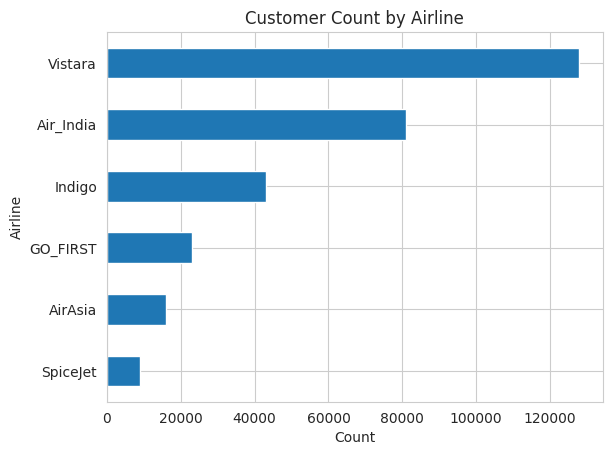

In [ ]:
airline_counts = df['airline'].value_counts().sort_values(ascending=True)
sns.set_style("whitegrid")

airline_counts.plot(kind='barh')
plt.title("Customer Count by Airline")
plt.xlabel("Count")
plt.ylabel("Airline")
plt.show()

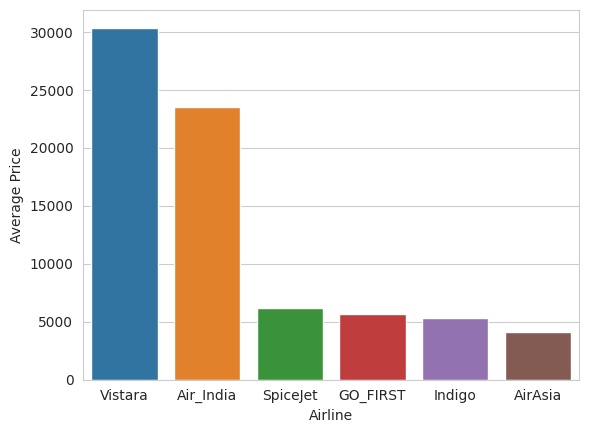

In [ ]:
avg_price = df.groupby('airline')['price'].mean().reset_index()
avg_price = avg_price.sort_values(by='price',ascending=False)
sns.barplot(x='airline', y='price', data=avg_price)

plt.xlabel('Airline')
plt.ylabel('Average Price')
plt.show()

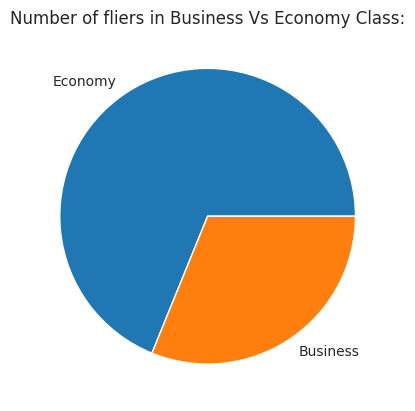

In [ ]:
class_counts = df['class'].value_counts()
class_counts.plot(kind='pie')
plt.title("Number of fliers in Business Vs Economy Class:")
plt.ylabel('')
plt.show()

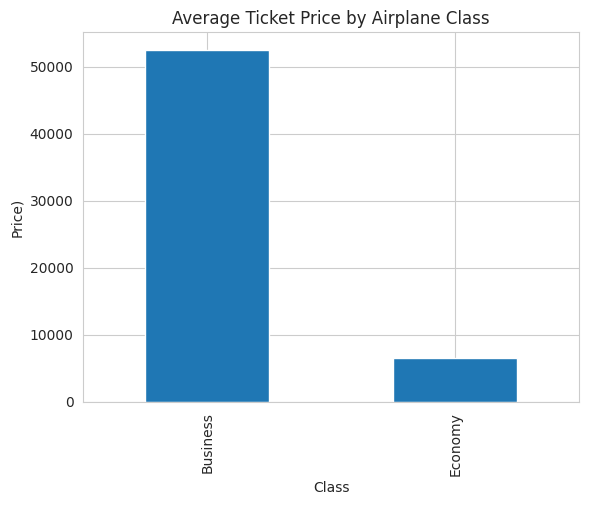

In [ ]:
class_prices = df.groupby('class')['price'].mean()
sns.set_style("whitegrid")
class_prices.plot(kind='bar')
plt.title("Average Ticket Price by Airplane Class")
plt.xlabel("Class")
plt.ylabel("Price)")
plt.show()

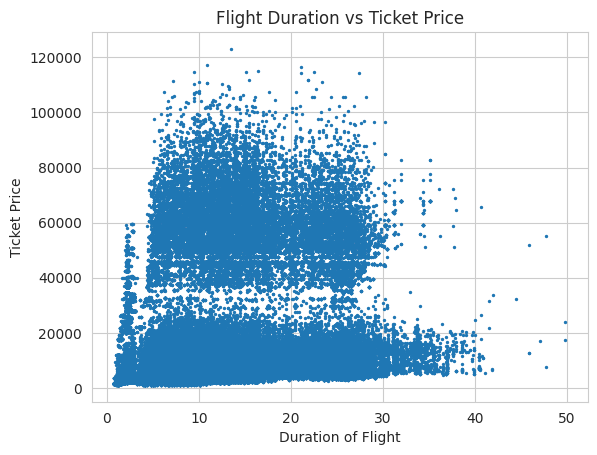

In [ ]:
plt.scatter(df['duration'], df['price'], s=2)

plt.title("Flight Duration vs Ticket Price")
plt.xlabel("Duration of Flight")
plt.ylabel("Ticket Price")
plt.show()

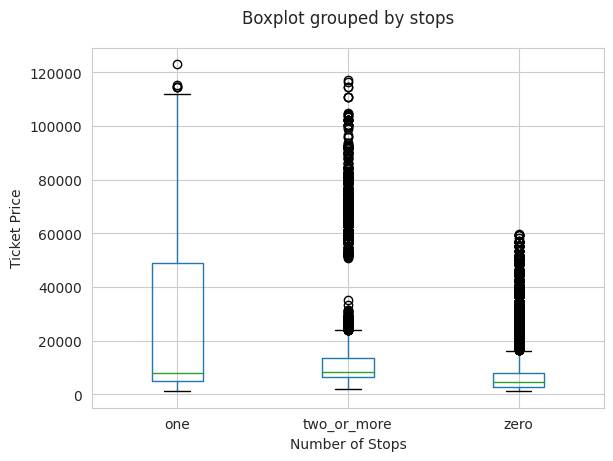

In [ ]:
df.boxplot(column='price', by='stops')

plt.title("")
plt.xlabel("Number of Stops")
plt.ylabel("Ticket Price")
plt.show()

In [ ]:
category_cols = list(df.select_dtypes(include=['object']).columns)
print(f"Number of categorical columns: {len(category_cols)}")
print(f"Categorical columns:\n{category_cols}")

Number of categorical columns: 7
Categorical columns:
['airline', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class']


In [ ]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 kB 3.2 MB/s eta 0:00:00


In [ ]:
import category_encoders as ce

te = ce.TargetEncoder(cols=category_cols)
df = te.fit_transform(df, df['price'])


In [ ]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
print(numeric_cols)


['airline', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class', 'duration', 'days_left', 'price']


In [ ]:
features_with_na = [col for col in df.columns if df[col].isna().sum() > 0]

missing_values_df = pd.DataFrame(df[features_with_na].isnull().mean().sort_values(ascending=False), columns=["percentage"])
missing_values_df.head(10)

,percentage


In [ ]:
names = df.columns
indexes = df.index
sc = MinMaxScaler((0, 1)) #between 0 and 1 range
df = sc.fit_transform(df)
data_scaled = pd.DataFrame(df, columns=names, index=indexes)
data_scaled.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0.079383,0.0,0.867088,0.0,0.876048,0.833363,0.0,0.027347,0.0,0.039749
1,0.079383,0.0,0.804496,0.0,0.930839,0.833363,0.0,0.030612,0.0,0.039749
2,0.000000,0.0,0.804496,0.0,0.315340,0.833363,0.0,0.027347,0.0,0.039773
3,1.000000,0.0,0.896027,0.0,0.613097,0.833363,0.0,0.028980,0.0,0.039765
4,1.000000,0.0,0.896027,0.0,0.930839,0.833363,0.0,0.030612,0.0,0.039765


In [ ]:
target = data_scaled['price']
features = data_scaled.drop(['price'], axis=1)

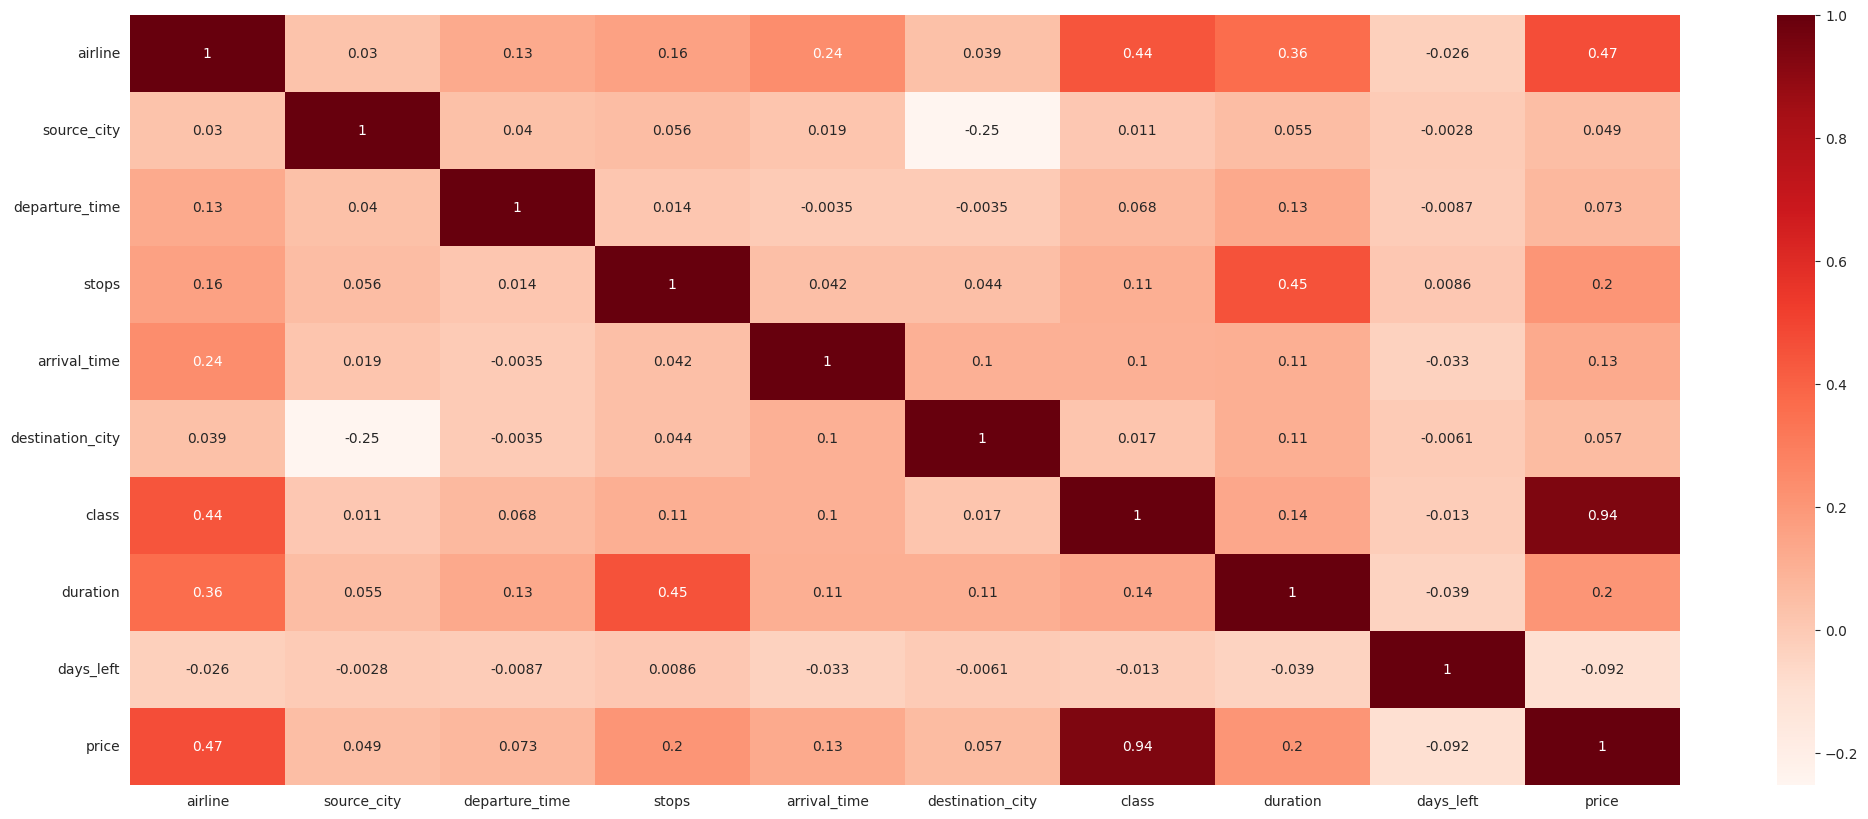

In [ ]:
plt.figure(figsize=(25,10))
cor = data_scaled.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
cor_target = abs(cor["price"])

relevant_features = cor_target
relevant_features 

airline             0.471865
source_city         0.049099
departure_time      0.072732
stops               0.203405
arrival_time        0.128853
destination_city    0.056619
class               0.937860
duration            0.204222
days_left           0.091949
price               1.000000
Name: price, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(features,target,random_state=1,test_size=0.25)

**LINEAR REGRESSION**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


lr = LinearRegression().fit(xtrain, ytrain)


y_pred_train = lr.predict(xtrain)
y_pred_test = lr.predict(xtest)


accuracy_train = lr.score(xtrain, ytrain)
mse_train = mean_squared_error(ytrain, y_pred_train)
r2_train = r2_score(ytrain, y_pred_train)


accuracy_test = lr.score(xtest, ytest)
mse_test = mean_squared_error(ytest, y_pred_test)
r2_test = r2_score(ytest, y_pred_test)

print("Accuracy - Train: {:} Test: {:}".format(accuracy_train, accuracy_test))
print("MSE - Train: {:} Test: {:}".format(mse_train, mse_test))
print("R2 - Train: {:} Test: {:}".format(r2_train, r2_test))

Accuracy - Train: 0.90184513265576 Test: 0.9027582495055123
MSE - Train: 0.0034012136863739253 Test: 0.003362280920747285
R2 - Train: 0.90184513265576 Test: 0.9027582495055123


Linear Regression: 90% Accuracy


**DECISION TREE REGRESSOR**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

dt = DecisionTreeRegressor(random_state=42)

dt.fit(xtrain, ytrain)

y_pred_train = dt.predict(xtrain)
y_pred_test = dt.predict(xtest)


accuracy_train = dt.score(xtrain, ytrain)
mse_train = mean_squared_error(ytrain, y_pred_train)
r2_train = r2_score(ytrain, y_pred_train)


accuracy_test = dt.score(xtest, ytest)
mse_test = mean_squared_error(ytest, y_pred_test)
r2_test = r2_score(ytest, y_pred_test)

print("Accuracy - Train: {:} Test: {:}".format(accuracy_train, accuracy_test))
print("MSE - Train: {:} Test: {:}".format(mse_train, mse_test))
print("R2 - Train: {:} Test: {:}".format(r2_train, r2_test))

Accuracy - Train: 0.9993436557964834 Test: 0.976510376857385
MSE - Train: 2.2743313178178756e-05 Test: 0.0008121893253293027
R2 - Train: 0.9993436557964834 Test: 0.976510376857385


DECISION TREE REGRESSOR : 97.6% Accuracy

**RANDOM FOREST**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=10, random_state=42)
rf.fit(xtrain, ytrain)

y_pred_train = rf.predict(xtrain)
y_pred_test = rf.predict(xtest)


accuracy_train = rf.score(xtrain, ytrain)
mse_train = mean_squared_error(ytrain, y_pred_train)
r2_train = r2_score(ytrain, y_pred_train)


accuracy_test = rf.score(xtest, ytest)
mse_test = mean_squared_error(ytest, y_pred_test)
r2_test = r2_score(ytest, y_pred_test)

print("Accuracy - Train: {:} Test: {:}".format(accuracy_train, accuracy_test))
print("MSE - Train: {:} Test: {:}".format(mse_train, mse_test))
print("R2 - Train: {:} Test: {:}".format(r2_train, r2_test))

Accuracy - Train: 0.9967436432130787 Test: 0.9845162943128614
MSE - Train: 0.00011283765717445439 Test: 0.0005353725940719641
R2 - Train: 0.9967436432130787 Test: 0.9845162943128614


Random forest: 98.4% Accuracy

XGBOOST

In [ ]:
import xgboost as xgb

XGB = xgb.XGBRegressor(objective ='reg:squarederror', n_estimators = 10, seed = 42)

XGB.fit(xtrain, ytrain)

y_pred_train = XGB.predict(xtrain)
y_pred_test = XGB.predict(xtest)


accuracy_train = XGB.score(xtrain, ytrain)
mse_train = mean_squared_error(ytrain, y_pred_train)
r2_train = r2_score(ytrain, y_pred_train)


accuracy_test = XGB.score(xtest, ytest)
mse_test = mean_squared_error(ytest, y_pred_test)
r2_test = r2_score(ytest, y_pred_test)

print("Accuracy - Train: {:} Test: {:}".format(accuracy_train, accuracy_test))
print("MSE - Train: {:} Test: {:}".format(mse_train, mse_test))
print("R2 - Train: {:} Test: {:}".format(r2_train, r2_test))

Accuracy - Train: 0.9550238780342752 Test: 0.9564580022667188
MSE - Train: 0.001558490228032719 Test: 0.0015055305718517647
R2 - Train: 0.9550238780342752 Test: 0.9564580022667188


XGBOOST : 95.4% Accuracy

**ADABOOST**

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
abr = AdaBoostRegressor(n_estimators=50, learning_rate=0.1, random_state=42)
abr.fit(xtrain, ytrain)

y_pred_train = abr.predict(xtrain)
y_pred_test = abr.predict(xtest)


accuracy_train = abr.score(xtrain, ytrain)
mse_train = mean_squared_error(ytrain, y_pred_train)
r2_train = r2_score(ytrain, y_pred_train)


accuracy_test = abr.score(xtest, ytest)
mse_test = mean_squared_error(ytest, y_pred_test)
r2_test = r2_score(ytest, y_pred_test)

print("Accuracy - Train: {:} Test: {:}".format(accuracy_train, accuracy_test))
print("MSE - Train: {:} Test: {:}".format(mse_train, mse_test))
print("R2 - Train: {:} Test: {:}".format(r2_train, r2_test))

Accuracy - Train: 0.9351608721477815 Test: 0.9367942446293773
MSE - Train: 0.0022467732373381466 Test: 0.0021854347981540238
R2 - Train: 0.9351608721477815 Test: 0.9367942446293773


ADABOOST: 93% Accuracy

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(learning_rate=0.1, n_estimators=100, max_depth=3)

gb.fit(xtrain, ytrain)

y_pred_train = gb.predict(xtrain)
y_pred_test = gb.predict(xtest)


accuracy_train = gb.score(xtrain, ytrain)
mse_train = mean_squared_error(ytrain, y_pred_train)
r2_train = r2_score(ytrain, y_pred_train)


accuracy_test = gb.score(xtest, ytest)
mse_test = mean_squared_error(ytest, y_pred_test)
r2_test = r2_score(ytest, y_pred_test)

print("Accuracy - Train: {:} Test: {:}".format(accuracy_train, accuracy_test))
print("MSE - Train: {:} Test: {:}".format(mse_train, mse_test))
print("R2 - Train: {:} Test: {:}".format(r2_train, r2_test))

Accuracy - Train: 0.9521876417495693 Test: 0.9535478852235296
MSE - Train: 0.0022467732373381466 Test: 0.0021854347981540238
R2 - Train: 0.9351608721477815 Test: 0.9367942446293773


Gradient Boosting: 94% Accuracy